In [1]:
library(tidyverse)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
workshop_topics = ['Stress Optimization',
              'Mindset Coaching',
              'Sleep Strategies',
              'Social Wellbeing',
              'Leadership and Teamwork',
              'Physical Health & Fitness',
              'Nutrition & Gut Health']

temp = qwl_df.iloc[:,55:62]
temp = temp.set_axis(workshop_topics, axis=1)
temp['Country'] = qwl_df.iloc[:,4]
temp = temp.set_index('Country')
vg_df = temp.melt(var_name = "Workshop_Topic", value_name = "Preference", ignore_index = False)
vg_df = vg_df.reset_index(level=0)

data = vg_df[(vg_df['Country'] == 'HK & Macau')]
vertical_boxplot = alt.Chart(data, title = "Workshop Preference (lower is more important)").mark_boxplot().encode(
    x = 'Workshop_Topic',
    y = 'Preference',
    color = 'Workshop_Topic'
).properties(
    width=400,
    height=180
)

vertical_boxplot

ERROR: Error in parse(text = x, srcfile = src): <text>:1:19: unexpected '['
1: workshop_topics = [
                      ^


In [3]:
library(dash)
library(dashHtmlComponents)
library(ggplot2)
library(plotly)
library(tidyr)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




Rows: 148 Columns: 71
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): Timestamp, Role Classification, Country of Residence, 2b. If yes t...
dbl (41): Username, Total score, 1. Does your company offer health & wellnes...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


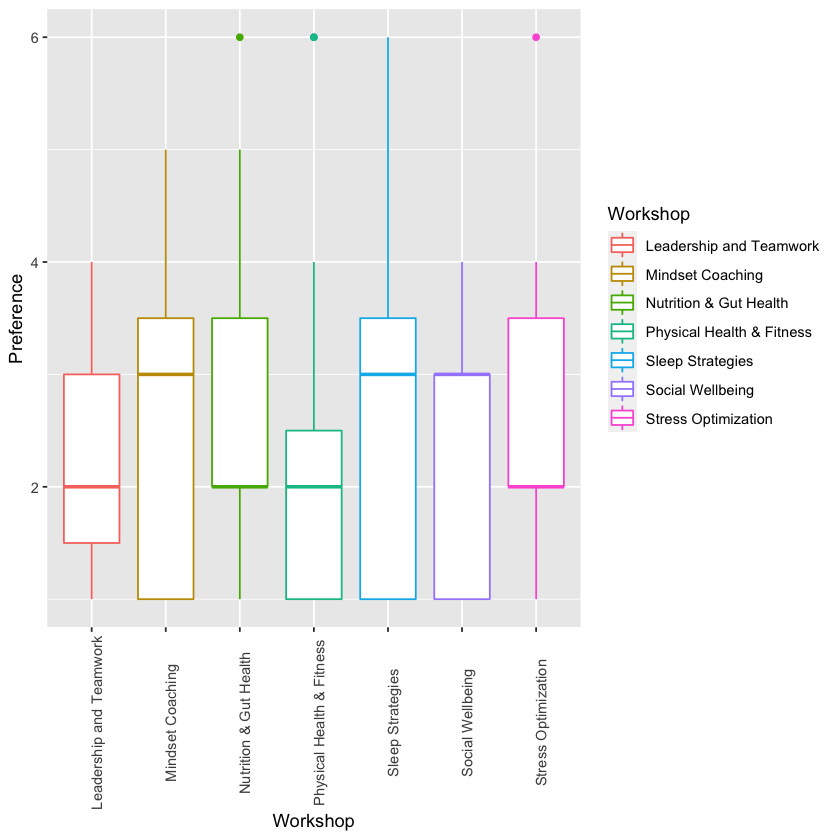

In [4]:

library(ggplot2)
library(tidyverse)
workshop_topics <- c('Stress Optimization',
                    'Mindset Coaching',
                    'Sleep Strategies',
                    'Social Wellbeing',
                    'Leadership and Teamwork',
                    'Physical Health & Fitness',
                    'Nutrition & Gut Health')

qwl_df <- read_csv("bei_vita_qwl_assessment.csv") 
names(qwl_df)[5] = "Country"

temp <- qwl_df[,56:62]
colnames(temp) <- workshop_topics
temp$Country = qwl_df$Country

temp <- temp |>
    pivot_longer(!Country, names_to = "Workshop", values_to = "Preference")# |>
 #   filter(Country == "Japan")

plot <- ggplot(temp |> filter(Country == "Japan")) +
    aes(x = Workshop, y = Preference, color = Workshop) +
    geom_boxplot(aes(middle = mean(Preference)))+ 
    theme(axis.text.x = element_text(angle = 90))
plot

In [6]:
library(dash)
library(dashBootstrapComponents)
library(dashCoreComponents)
library(ggplot2)
library(plotly)
library(tidyverse)

workshop_topics <- c('Stress Optimization',
                    'Mindset Coaching',
                    'Sleep Strategies',
                    'Social Wellbeing',
                    'Leadership and Teamwork',
                    'Physical Health & Fitness',
                    'Nutrition & Gut Health')

qwl_df <- read_csv("bei_vita_qwl_assessment.csv") 
names(qwl_df)[5] = "Country"

temp <- qwl_df[,56:62]
colnames(temp) <- workshop_topics
temp$Country = qwl_df$Country

temp <- temp %>%
    pivot_longer(!Country, names_to = "Workshop", values_to = "Preference")

app <- Dash$new(external_stylesheets = dbcThemes$BOOTSTRAP)

title = paste0('Japan', " Workshop Preference (lower is more important)")
plot <- ggplot(temp) +
    aes(x = Workshop, y = Preference, color = Workshop) +
    geom_boxplot(aes(middle = mean(Preference))) + 
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle(title)
app$layout(
    dbcContainer(
            dccGraph(
                figure = ggplotly(plot)
            )))


app$run_server(debug = F)

Rows: 148 Columns: 71
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): Timestamp, Role Classification, Country of Residence, 2b. If yes t...
dbl (41): Username, Total score, 1. Does your company offer health & wellnes...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
⚠ Note: As of version 1.0, the following packages are deprecated and
should no longer be installed or loaded when using Dash for R:
`dashHtmlComponents`, `dashCoreComponents`, `dashTable`. These
components are now bundled within the `dash` package.

Fire started at 127.0.0.1:8050



In [ ]:
library(dash)
library(dashBootstrapComponents)
library(dashCoreComponents)
library(ggplot2)
library(plotly)
library(tidyverse)

workshop_topics <- c('Stress Optimization',
                    'Mindset Coaching',
                    'Sleep Strategies',
                    'Social Wellbeing',
                    'Leadership and Teamwork',
                    'Physical Health & Fitness',
                    'Nutrition & Gut Health')

qwl_df <- read_csv("bei_vita_qwl_assessment.csv") 
names(qwl_df)[5] = "Country"

temp <- qwl_df[,56:62]
colnames(temp) <- workshop_topics
temp$Country = qwl_df$Country

temp <- temp %>%
    pivot_longer(!Country, names_to = "Workshop", values_to = "Preference")

app <- Dash$new(external_stylesheets = dbcThemes$BOOTSTRAP)

app$layout(
    dbcContainer(
        list(
            dccGraph(id='plot'),
            dccDropdown(
                id='country-select',
                options = unique(temp$Country)%>%map(function(con) list(label = con, value = con)), 
                value = 'Japan'
            )
        )
    )
)

app$callback(
    output(id = 'plot', property = 'figure'),
    list(input(id = 'country-select', property = 'value')),
    function(c) {
        temp <- temp %>% filter(Country == c)
        p <- ggplot(temp)+
            aes(x = Workshop, y = Preference, color = Workshop) +
            geom_boxplot(aes(middle = mean(Preference))) + 
            theme(axis.text.x = element_text(angle = 90)) +
            #ggtitle(title) +
            ggthemes::scale_color_tableau()
        ggplotly(p)
    }
)

app$run_server(debug = F)

Rows: 148 Columns: 71
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): Timestamp, Role Classification, Country of Residence, 2b. If yes t...
dbl (41): Username, Total score, 1. Does your company offer health & wellnes...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
⚠ Note: As of version 1.0, the following packages are deprecated and
should no longer be installed or loaded when using Dash for R:
`dashHtmlComponents`, `dashCoreComponents`, `dashTable`. These
components are now bundled within the `dash` package.

Fire started at 127.0.0.1:8050



In [ ]:
temp |> filter(Country == 'Japan')